In [81]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics , neighbors

In [82]:
file_path = 'Car_evaluation.xlsx'
data = pd.read_excel(file_path, 
                     names =['buying','maint','doors','persons','lug_boot','safety','class'] )

data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [83]:
X = data.drop(['class'] , axis = 1)
y = data[['class']]

print(X.shape)
print(f"\n{y['class'].unique()}")

(1727, 6)

['unacc' 'acc' 'vgood' 'good']


In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [85]:
print(X['buying'].unique())
print(X['maint'].unique())
print(X['doors'].unique())
print(X['persons'].unique())
print(X['lug_boot'].unique())
print(X['safety'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
[2 3 4 '5more']
[2 4 'more']
['small' 'med' 'big']
['med' 'high' 'low']


In [86]:
X["doors"] = X["doors"].astype(str)
X["persons"] = X["persons"].astype(str)

In [87]:
le = LabelEncoder()
X = X.apply(le.fit_transform)

X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [ ]:
label_mapping = {'unacc' : 0,
                'acc' : 1,
                'good' : 2,
                'vgood' : 3}
y = y['class'].map(label_mapping)
y = np.array(y)

print(y)

[0 0 0 ... 0 2 3]


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

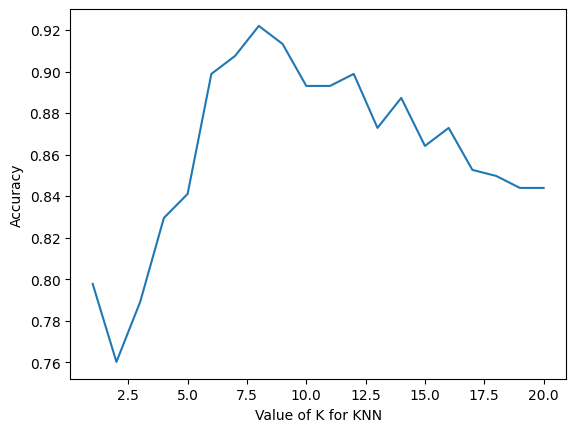

In [90]:
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k , weights = 'distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()

In [91]:
k = 8

knn = neighbors.KNeighborsClassifier(n_neighbors = k , weights = 'distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9219653179190751
